In [1]:
import os
import random

import numpy as np
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
%matplotlib inline

random_state = 42
exp_dir = '../experiments/multi_proto-cub-3fa32deef2-1-00001/custom_data'
filenames = [os.path.join(exp_dir, f) for f in os.listdir(exp_dir) if f.startswith('prototypes')]
filenames = sorted(filenames)
prototypes = np.array([np.load(f) for f in filenames])
n_tasks, n_protos, n_classes, hid_dim = prototypes.shape

The history saving thread hit an unexpected error (DatabaseError('database disk image is malformed')).History will not be written to the database.


In [2]:
prototypes = prototypes.reshape(n_tasks, n_protos * n_classes, hid_dim)
classes = np.repeat(np.arange(n_classes), n_protos)

In [17]:
TASK = 9

In [4]:
tsne = TSNE(random_state=random_state, verbose=1)
tsne.fit(prototypes[TASK])

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 10000 samples in 0.715s...
[t-SNE] Computed neighbors for 10000 samples in 92.765s...
[t-SNE] Computed conditional probabilities for sample 1000 / 10000
[t-SNE] Computed conditional probabilities for sample 2000 / 10000
[t-SNE] Computed conditional probabilities for sample 3000 / 10000
[t-SNE] Computed conditional probabilities for sample 4000 / 10000
[t-SNE] Computed conditional probabilities for sample 5000 / 10000
[t-SNE] Computed conditional probabilities for sample 6000 / 10000
[t-SNE] Computed conditional probabilities for sample 7000 / 10000
[t-SNE] Computed conditional probabilities for sample 8000 / 10000
[t-SNE] Computed conditional probabilities for sample 9000 / 10000
[t-SNE] Computed conditional probabilities for sample 10000 / 10000
[t-SNE] Mean sigma: 1.458425
[t-SNE] KL divergence after 250 iterations with early exaggeration: 95.599457
[t-SNE] KL divergence after 1000 iterations: 4.598708


TSNE(angle=0.5, early_exaggeration=12.0, init='random', learning_rate=200.0,
     method='barnes_hut', metric='euclidean', min_grad_norm=1e-07,
     n_components=2, n_iter=1000, n_iter_without_progress=300, n_jobs=None,
     perplexity=30.0, random_state=42, verbose=-1)

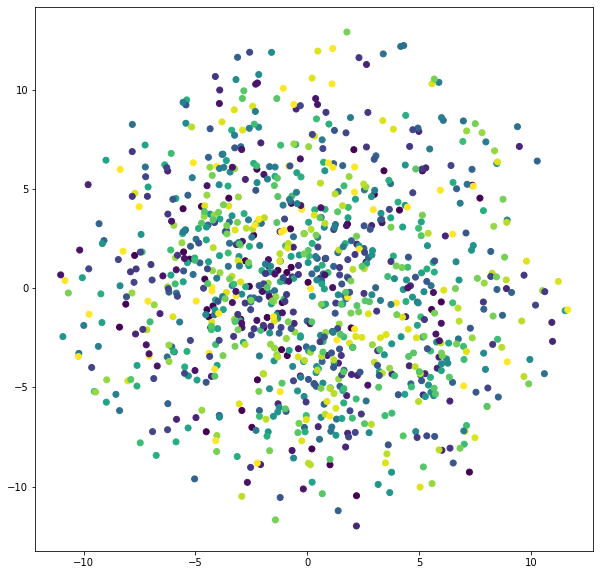

In [47]:
n_classes_to_show = 20
classes_to_show = random.sample(range(n_classes), k=n_classes_to_show)
classes_to_show = set(classes_to_show)

idx = [i for i, y in enumerate(classes) if y in classes_to_show]
colors = [list(classes_to_show).index(c) for c in classes[idx]]

plt.figure(figsize=(10, 10))
plt.scatter(tsne.embedding_[idx, 0], tsne.embedding_[idx][:, 1], c=colors)